In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
cell_df = pd.read_csv('Diabetes_cell.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

4    33
2    16
Name: Class, dtype: int64

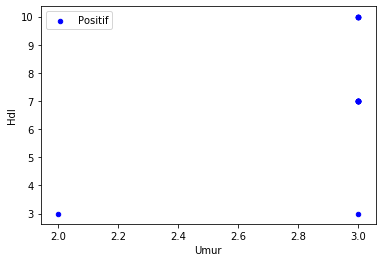

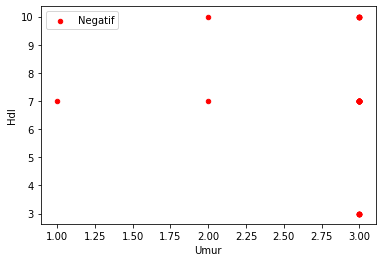

In [28]:
positif_df = cell_df[cell_df['Class']==2][0:200]
negatif_df = cell_df[cell_df['Class']==4][0:200]

axes = positif_df.plot(kind= 'scatter', x='Umur', y='Hdl', color='blue', label='Positif')

negatif_df.plot(kind= 'scatter', x='Umur', y='Hdl', color='red', label='Negatif')

In [29]:
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['Hdl'], errors='coerce').notnull()]
cell_df['Hdl'] = cell_df['Hdl'].astype('int')
cell_df.dtypes

ID        int64
Umur      int64
Sex      object
Glun      int64
Gpost     int64
Upost     int64
Actn      int64
Urn       int64
Actpp     int64
Ldl       int64
Hdl       int32
Chol      int64
Tg        int64
Class     int64
dtype: object

In [30]:
cell_df.columns

feature_df = cell_df[['Umur', 'Glun', 'Gpost', 'Upost', 'Actn', 'Urn', 'Actpp', 'Ldl', 'Hdl', 'Chol', 'Tg']]

x = np.asarray(feature_df)

y = np.asarray(cell_df['Class'])

y[0:5]

array([4, 4, 2, 4, 2], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

x_train.shape
y_train.shape

x_test.shape
y_test.shape

(10,)

In [32]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.50      1.00      0.67         2
           4       1.00      0.75      0.86         8

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10

